## Logistic Regression

Logistic regression is a regression model that finds the probability that a sample is of class 1 (the other class is 0). This is written as $P(y=+1 | x)$.

As you will see, logistic regression is directly related to linear models. First, a linear model is written as $X\theta$, which, if we're working with 1 feature and have added a bias term, is just $ax + b$. In linear regression, we set $ax + b$ or $X\theta$ to be $y$.

But, in logistic regression, our goal is to find the probability $P(y=+1 | x)$. Since our linear model $X\theta$ has a range between $[-\inf, \inf]$, we need a way to link the output of $X\theta$ to a probability.

While there are many possible link functions, the logit function is used because it is very intuitive to understand. More on that shortly. The logit function is defined as follows

$$logit(p) = ln\frac{p}{1 - p} = X\theta$$

First, let's examine the odds ratio $\frac{p}{1-p}$ via an example. Suppose the chance of the Warriors winning the championship was $p=.9$, then $1-p = .1$. So, $\frac{.9}{.1} = 9$ and thus the Warriors were 9 times more likely to win the championship than the Cavaliers. Likewise, if the Warriors were 9 times more likely to win the championship, then $p=.9$. As you can see, the odds ratio is an intutive understanding of the probabilities between two classes.

But, why use a logit? Well, first, the logit has the probability that its range is  $[-\inf, \inf]$, while its domain is $0 <= p <= 1$. In addition, we can easily interpret changes to the odd ratio via changes in $x$.
<img src="http://s3.amazonaws.com/cdn.graphpad.com/faq/1465/images/1465LogitLayout.png">

For example, take a sample $x$, which has 3 dimensions. Let's exclude the bias term for now. We can rewrite the above equation as $o = \frac{p}{1-p} = e^{x_0 \theta_0 + x_1 \theta_1 + x_2 \theta_2}$. Suppose all the features are binary, which means $x_i$ is either 0 or 1. Then, if we want to predict whether a student passes a class, and x_0, x_1, and x_2 represent whether a student has passed the preliminary test, the midterm, and the final respectively, then if the student has passed only the midterm, $o = e^{\theta_1}$, and if the student has passed both the midterm and the final, then $o = \theta_1 + \theta_2$. What this tells us is that for any unit increment in $x_i$, we multipy the odds ratio by $e^\theta_i$. This is something that is easier to understand than other link functions.

Now, you can either accept that we're using logit or go read up on other sources on this, but let's rewrite the equation such that we have $$p = \frac{1}{1 + e^{-X\theta}}$$. Do some math to convert $ln\frac{p}{1-p} = X\theta$ into this.


[-10.          -9.95991984  -9.91983968  -9.87975952  -9.83967936
  -9.7995992   -9.75951904  -9.71943888  -9.67935872  -9.63927856
  -9.5991984   -9.55911824  -9.51903808  -9.47895792  -9.43887776
  -9.3987976   -9.35871743  -9.31863727  -9.27855711  -9.23847695
  -9.19839679  -9.15831663  -9.11823647  -9.07815631  -9.03807615
  -8.99799599  -8.95791583  -8.91783567  -8.87775551  -8.83767535
  -8.79759519  -8.75751503  -8.71743487  -8.67735471  -8.63727455
  -8.59719439  -8.55711423  -8.51703407  -8.47695391  -8.43687375
  -8.39679359  -8.35671343  -8.31663327  -8.27655311  -8.23647295
  -8.19639279  -8.15631263  -8.11623246  -8.0761523   -8.03607214
  -7.99599198  -7.95591182  -7.91583166  -7.8757515   -7.83567134
  -7.79559118  -7.75551102  -7.71543086  -7.6753507   -7.63527054
  -7.59519038  -7.55511022  -7.51503006  -7.4749499   -7.43486974
  -7.39478958  -7.35470942  -7.31462926  -7.2745491   -7.23446894
  -7.19438878  -7.15430862  -7.11422846  -7.0741483   -7.03406814
  -6.99398

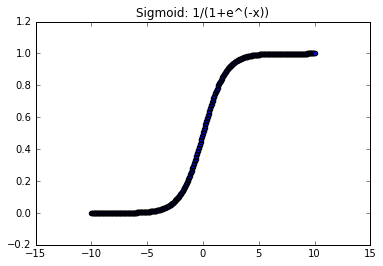

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1. / (1 + np.e ** (-x))

x_ = np.linspace(-10, 10, 500)
print x_
# print sigmoid(x_)
plt.scatter(x_, sigmoid(x_))
plt.title("Sigmoid: 1/(1+e^(-x))")
plt.show()

Now, what this tells us is that our goal is to fit a sigmoid to our today. This is in contrast to linear regression/classification where we try to fit a straight line to our data.

<img src="http://www.appstate.edu/~whiteheadjc/service/logit/logit.gif">

Now, what's our loss function and how do we find the optimal weights $\theta$. We can use our MSE and gradient descent. But, what's different is that our update function changes. First, let's cover maximum likelihood estimation and then you'll read about how its used in gradient descent.

We use a process called <b>maximum likelihood estimation</b>, which is the process of estimating an unknown parameter $p$. Here's an example: Suppose that you want to find out the true probability of a coin. You flip the coin 10 times, and 7 of the times, it lands heads. What's the most likely probability for the coin? It should be rather intuitive that you guess $\frac{7}{10}$. But, how would we prove this?

First, <a href="https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=3&ved=0ahUKEwix_NfW4cfNAhUL4GMKHQzeALYQFgg1MAI&url=http%3A%2F%2Fweb.stanford.edu%2F~kcobb%2Fhrp261%2Flecture4.ppt&usg=AFQjCNFtVPlqLW8SITc8LZW_ooQGOX9Nbw&sig2=CFptoRelL0HPqgJ6C6YlOA">take a look at these slides.</a>

We need to define a likelihood function that is a function of our unknown prarameter $p$. We notice that the number of heads ia binomial random variable with $likelihood = {10 \choose 7} p^7 (1-p)^3$. We would like to maximize the likelihood. So, how do we do that? Well, as usual, we take the derivative of likelihood with respect to our unknown parameters, which in this case is $p$. When we're applying logistic regression, our unknown parameters are our weights, $\theta$.

To make things easier, we usually take the log of both sides, so we have $log(likelihood) = log {10 \choose 7} + 7 log p + 3 log (1-p)$. Then, we take the derivative with respect to $p$, so $\frac{dL}{dp} = \frac{7}{p} - \frac{3}{1-p}$. We set $\frac{dL}{dp} = 0$ to maximize $p$, and solve for $p$ which is $\frac{7}{10}$. 

In general, the likelihood is the product of the probabilities of all the observed cases.

Okay, now read the classification and logistic regression section in this <a href="http://cs229.stanford.edu/notes/cs229-notes1.pdf">notes</a>.

<b>Let me know if you have any questions at this point. Otherwise, we'll begin coding. This time, you're coding pretty much from scratch.</b>

We'll use the Wikipedia <a href="https://en.wikipedia.org/wiki/Logistic_regression#Example:_Probability_of_passing_an_exam_versus_hours_of_study">example</a>.

In [3]:
# feel free to import anything you need
import numpy as np
import matplotlib.pyplot as plt
import random
hours_studying = np.array([0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50])
passed_exam = np.array([0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1])

def sigmoid(x):
    return 1. / (1 + np.e ** (-x))

Implement logistic regression. This would involve defining the cost function, implementing stochastic gradient descent (no need for batch and mini-batch). No need to do any maximum likelihood stuff, just know that that's how we get the weight update function. By the end, you should have your weights $a$ and $b$. Remember to add a bias term to hours_studying. Then plot $\frac{1}{1 + e^{-(a + b)x}}$ with $x$ being `hours_studying`. On the y axis, plot passed_exam.

In [4]:
X = np.reshape(hours_studying, (hours_studying.shape[0], 1))
X = np.insert(X, 0, 1, axis = 1)
y = passed_exam


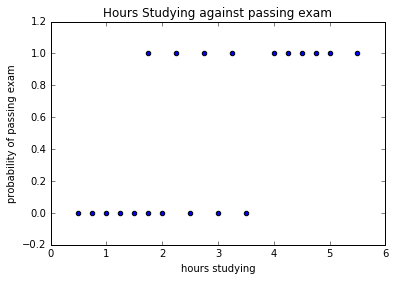

In [5]:
plt.scatter(X[:,1], y)
plt.title("Hours Studying against passing exam")
plt.xlabel("hours studying")
plt.ylabel("probability of passing exam")
plt.show()


In [12]:
def h(X, theta):
    return sigmoid(np.dot(X, theta))

m = X.shape[0]

def compute_cost(X, y, theta):
    return 1./(2*m) * sum((h(X, theta) - y)**2)

def stochastic_grad_descent(X, y, theta, alpha = 0.1, iterations = 1500):
    total_cost, theta_list = [], []
    for _ in range(iterations):
        for j in range(m):
            theta -= alpha* (h(X[j], theta) - y[j])*X[j]
            cost = compute_cost(X, y, theta)
            total_cost.append(cost)
            theta_list.append(theta)
    return theta, total_cost, theta_list



In [13]:
guess_theta = random.sample(range(11),2)
cost_studying = stochastic_grad_descent(X, y, guess_theta)
cost_studying

(array([-4.42479577,  1.62392606]),
 [0.24999780265990271,
  0.24999745917769159,
  0.24999701639296823,
  0.24999644098675639,
  0.24999568564746363,
  0.24999468215323517,
  0.24999468215358733,
  0.24999333036787769,
  0.24999333036797983,
  0.24999134053259375,
  0.24999134053263627,
  0.24998833141537893,
  0.24998833141540647,
  0.24998361819561171,
  0.24998361819562584,
  0.24998361819563245,
  0.24998361819563555,
  0.24998361819563697,
  0.24998361819563764,
  0.24998361819563777,
  0.24998125163430493,
  0.24997815555884095,
  0.24997407499345847,
  0.2499686364728036,
  0.2499612816316728,
  0.24995115438428839,
  0.24995115460349965,
  0.24993690204604016,
  0.24993690220919934,
  0.24991454848728012,
  0.24991454866444318,
  0.24987772797198726,
  0.24987772827956875,
  0.24981274711792342,
  0.24981274780761276,
  0.24981274831147238,
  0.24981274867874528,
  0.24981274894590955,
  0.24981274913988752,
  0.24981274924163321,
  0.24978267645153973,
  0.24974112903181034,


In [14]:
# let's plot the points and theta
def show_theta(X, y, theta):
    plt.scatter(X[:,1], y)
    x = np.linspace(5, 25, 10) # this gives u 10 samples evenly spaced between 5, 25
    # i printed the values below
    print x
    plt.plot(x, theta[0] + theta[1] * x)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    
def show_costs(costs, num_iterations):
    # for stochastic, since we update on every sample, we have more costs than iterations.
    # so, we create len(costs) number of intervals between [0, num_iterations]
    plt.plot(np.linspace(0, num_iterations, len(costs)), costs)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.show()

[  5.           7.22222222   9.44444444  11.66666667  13.88888889
  16.11111111  18.33333333  20.55555556  22.77777778  25.        ]


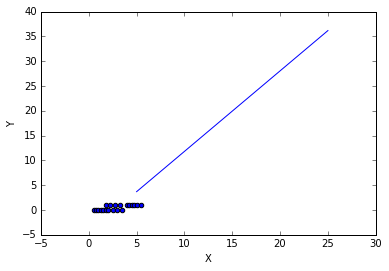

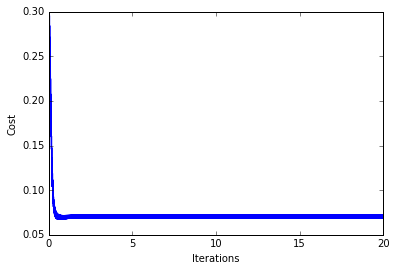

Final cost:  0.0691560695593
Theta:  [-4.42479577  1.62392606]


In [15]:
theta, total_cost, theta_list = stochastic_grad_descent(X, y, guess_theta)
show_theta(X, y, theta)
show_costs(total_cost, 20)
print "Final cost: ", total_cost[-1]
print "Theta: ", theta


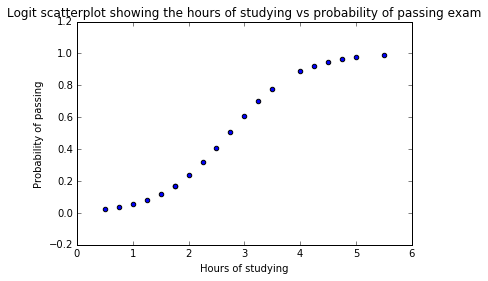

In [16]:
def sigmoid(x):
    return 1. / (1 + np.e ** (-x))

# print sigmoid(np.dot(X, theta_new))
plt.scatter(hours_studying, sigmoid(np.dot(X, theta)))
plt.title("Logit scatterplot showing the hours of studying vs probability of passing exam")
plt.xlabel("Hours of studying")
plt.ylabel("Probability of passing")
plt.show()